## GlADE+ catalog visualization

In this notebook, we use the `healpy` library to visualize the data output from the `parse_catalog` script. We follow the tutorial provided in the [`healpy` documentation](https://healpy.readthedocs.io/en/latest/tutorial.html).

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import healpy as hp
import h5py

In [27]:
# Constants
nside = 32
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        nside, hp.nside2resol(nside, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 32 is 1.8 deg


Number of pixels in the map:

In [28]:
npix = hp.nside2npix(nside)
npix

12288

Importing file:

In [29]:
f = h5py.File('output.hdf5', 'r')
list(f.keys())

['dec', 'ra', 'skymap', 'z']

<HDF5 dataset "skymap": shape (99787,), type "<i8">
[ 0.  0.  0. ... 19. 14. 14.]


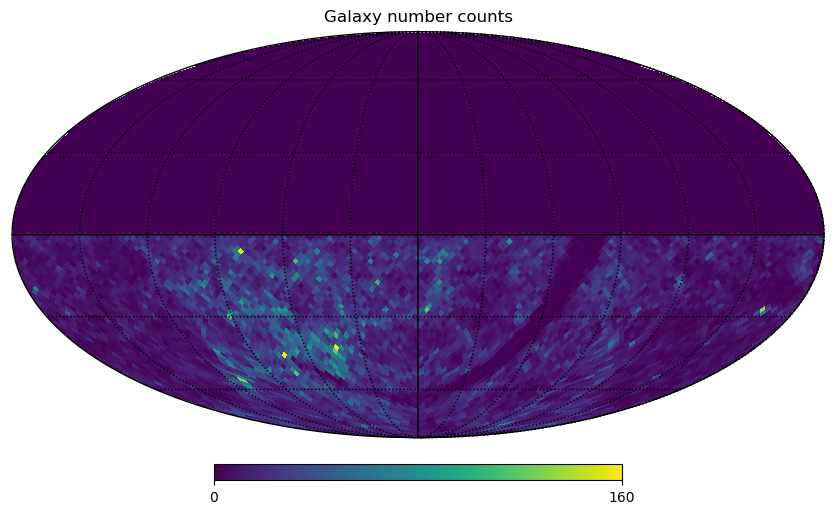

In [30]:
skymap_indices = f['skymap']
print(skymap_indices)
nonempty_pixels, counts = np.unique(skymap_indices, return_counts=True)
skymap = np.zeros(npix)
for pixel, count in zip(nonempty_pixels, counts):
    skymap[pixel] = count
print(skymap)
hp.mollview(skymap, title="Galaxy number counts")
hp.graticule()